## graph - state - edges - nodes - invoke - stategraph

In [1]:
def function1(input1):
    return input1+ " from first function"

In [2]:
def function2(input2):
    return input2+ "  from second function"

In [3]:
def function3(input3):
    pass

In [4]:
function1("Hello")

'Hello from first function'

In [5]:
function2("World")

'World  from second function'

In [6]:
from langgraph.graph import Graph

In [7]:
workflow1=Graph()

In [8]:
workflow1.add_node("fun1",function1)

In [9]:
workflow1.add_node("fun2",function2)

In [10]:
workflow1.add_edge("fun1","fun2")

In [11]:
workflow1.set_entry_point("fun1")

In [12]:
workflow1.set_finish_point("fun2")

In [13]:
app=workflow1.compile()

In [14]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [15]:
from IPython.display import Image, display

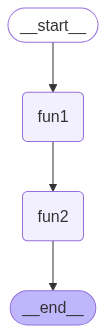

In [16]:
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
app.invoke("Agentic AI ")


'Agentic AI  from first function  from second function'

In [18]:
#Visualize the o/p of workflow node wise
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fun1
_______
hi this is rohit from first function


here is output from fun2
_______
hi this is rohit from first function  from second function




In [19]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [20]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [21]:
from langchain_groq import ChatGroq
model = ChatGroq(model="allam-2-7b")

In [22]:
def llm(input):
    from langchain_groq import ChatGroq
    model = ChatGroq(model="allam-2-7b")
    output=model.invoke(input)
    return output.content

In [23]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [24]:
workflow2=Graph()

In [25]:
workflow2.add_node("llm", llm)

In [26]:
workflow2.add_node("token_counter", token_counter)

In [27]:
workflow2.add_edge("llm", "token_counter")

In [28]:
workflow2.set_entry_point("llm")

In [29]:
workflow2.set_finish_point("token_counter")

In [30]:
app=workflow2.compile()

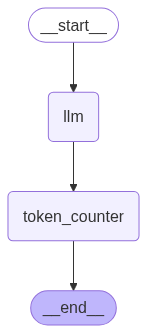

In [31]:
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 571'

In [33]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in the generated answer is 2159'

In [34]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"Here is output from {key}")
        print("_______")
        print(value)

Here is output from llm
_______
The Tata Enterprise, also known as the Tata Group, is a highly diversified Indian conglomerate founded in 1868 by Jamsetji Tata. It is one of the largest and oldest business families in India, with a rich history of industrial and philanthropic endeavors. The Tata Group comprises over 100 companies spanning various sectors, including automotive, aviation, steel, telecommunications, agriculture, hotels, and more.

Let's dive into the history, structure, and major achievements of the Tata Enterprise:

1. Founding and Early Years:
   - Jamsetji Tata, a Parsi businessman, established the Tata Group with his first company, Tata Sons Limited, in 1868.
   - Jamsetji's son, Sir Ratan Tata, took over the leadership of the group in 1932 and played a significant role in expanding the company's portfolio.
   - Under his guidance, the Tata Group diversified into sectors like steel, textiles, and aviation.

2. Expansion and Modernization:
   - In the 1950s and 1960s, 